In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install --upgrade scikit-learn


  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [3]:
import sklearn
print(sklearn.__version__)


1.5.0


In [4]:
import sklearn
print(sklearn.__version__)



1.5.0


### 1. Load Dataset and get an overview

In [5]:
# Get Dataset File Path
# path = os.path.abspath("")
# Alternatively
path = os.getcwd()
file = path + "\Mall_Customers_nonull.csv"
file


'C:\\Users\\Bhavana padisetty\\Mall_Customers_nonull.csv'

In [6]:
# Load Mall Customers  Dataset
df = pd.read_csv(file)
df


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
# Get Top 5 Records
df.head()


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Get last 5 records
df.tail()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
# Print Column Names Only
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

### Drop Un-important Columns

In [10]:
#Drop CustomerID
df.drop(columns="CustomerID", inplace=True) 
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
# Get Size of Dataset (Rows and Columns)
df.shape


(200, 4)

In [12]:
# Get Information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [13]:
df['Gender']=df['Gender'].apply(lambda x:0 if x=="Male" else 1)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Data Manipulation

### 2.Check for Null Values and Manipulate Data,if Null Values found

### Find Null Values-Summary

In [14]:
# To find the total no.of rows which are missing value in a column
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [15]:
# This will display rows with at least one null value across all columns
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,Gender,Age,Annual_Income,Spending_Score


In [16]:
# # Impute with median
# df['Annual_Income_kdollars'].fillna(df['Annual_Income_kdollars'].median(), inplace=True)
# df['Annual_Income_kdollars']

### 3. Check for Duplicates and Drop those Rows, if Duplicates found

### Check for Duplicate Data

In [17]:
# This will display all duplicate rows (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Gender,Age,Annual_Income,Spending_Score


In [18]:
 # This will display all duplicate rows (including the first occurrence)
all_duplicate_rows = df[df.duplicated(keep=False)]
all_duplicate_rows

,Gender,Age,Annual_Income,Spending_Score


In [19]:
# Remove Duplicate Rows, ifany
# Keep first row and remove other duplicate rows of that row
df = df.drop_duplicates(keep='first')
df

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [20]:
# Summary statistics
# if std is 0, that column should be removed from analysis
df.describe()


,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### 4. Data Visualization

### Histograms

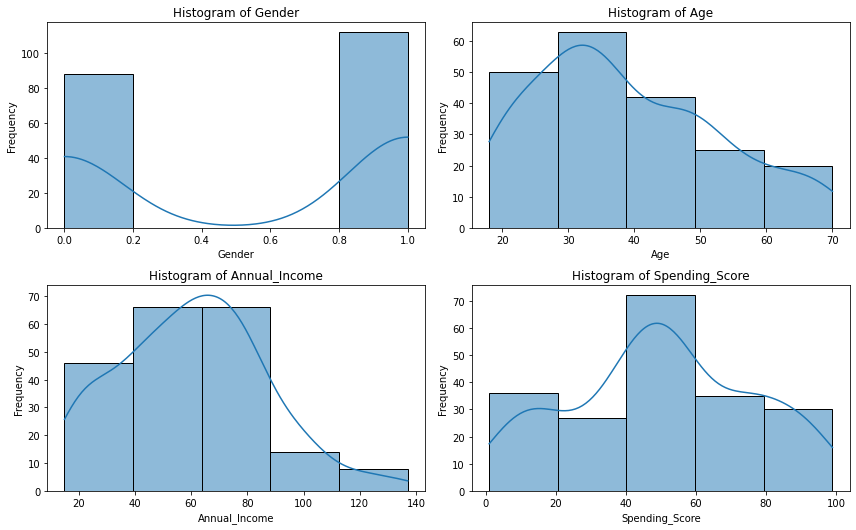

In [21]:
# Create subplots for the histograms
plt.figure(figsize=(12, 18))
for i, var in enumerate(df, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[var], bins=5, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

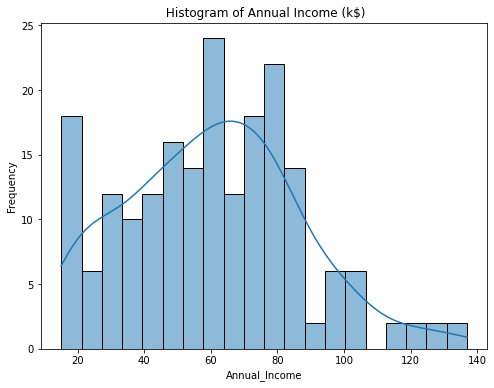

In [22]:
# Histogram of a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual_Income'], bins=20, kde=True)
plt.title(' Histogram of Annual Income (k$)')
plt.xlabel('Annual_Income')
plt.ylabel('Frequency')
plt.show()

### Count Plots

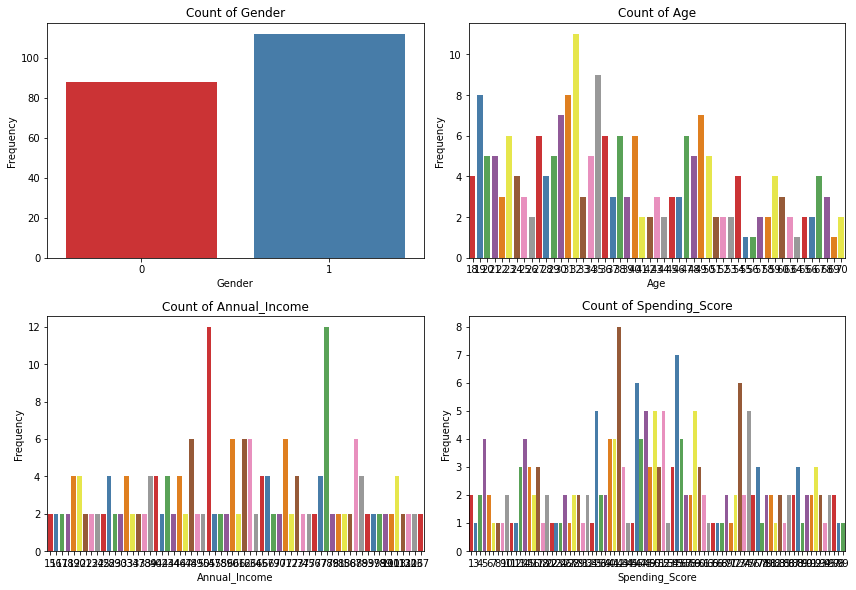

In [23]:
# Select only numeric type of columns by their names as:
df1 = df[['Gender','Age','Annual_Income','Spending_Score']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 16))
for i, var in enumerate(df1, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=df[var], palette="Set1")
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Handling Outliers

### Box Plots

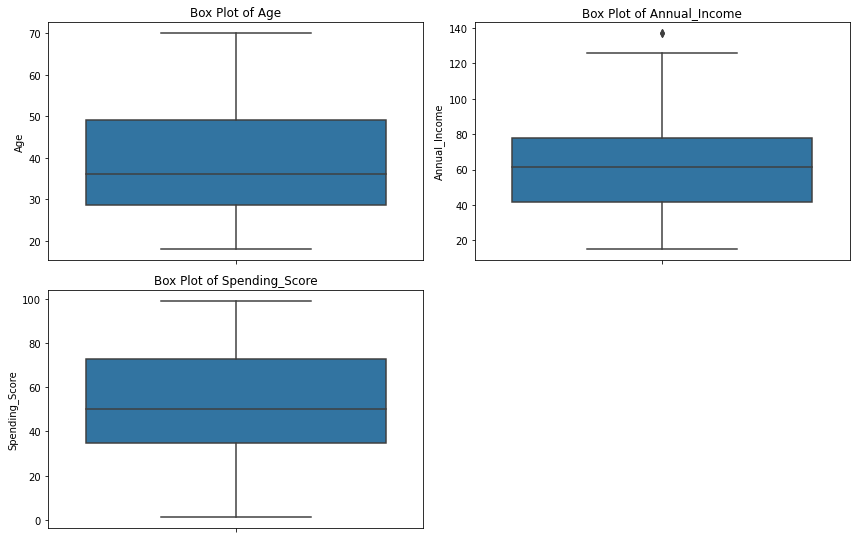

In [24]:
# Select only numeric type of columns by their names as:
df1 = df[['Age','Annual_Income','Spending_Score']]
df1
# Create subplots for Box Plots
plt.figure(figsize=(12, 15))
for i, var in enumerate(df1, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=var, data=df)
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

### 4. Apply Machine Learning Algorithm

In [25]:
# Select only numeric type of columns by their names as:
x = df[['Age','Annual_Income','Spending_Score']]
x

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [27]:
# Determine the optimal number of clusters using the elbow method
# WCSS stands for 'within-cluster sum of squares'
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

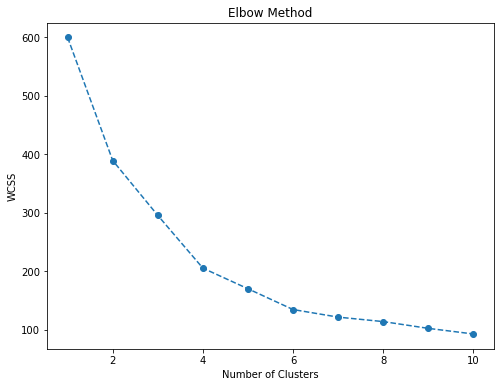

In [28]:
# Plotting the elbow method graph to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [29]:
# Based on the elbow method, choose the optimal number of clusters and fit the KMeans model
optimal_num_clusters =4 # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [30]:
print(kmeans.cluster_centers_.shape)


(4, 3)


In [31]:
# # Reshape scaler parameters to ensure compatibility
# scale_reshaped = scaler.scale_.reshape(1, -1)
# mean_reshaped = scaler.mean_.reshape(1, -1)

# # Ensure that mean_reshaped has the same number of columns as kmeans.cluster_centers_
# mean_reshaped = mean_reshaped[:, :kmeans.cluster_centers_.shape[1]]

# # Calculate scaling and mean for each feature
# scale_for_each_feature = scale_reshaped[:, :kmeans.cluster_centers_.shape[1]]
# mean_for_each_feature = mean_reshaped[:, :kmeans.cluster_centers_.shape[1]]

# # Rescale cluster centers manually
# cluster_centers = kmeans.cluster_centers_ * scale_for_each_feature + mean_for_each_feature

# # Create a DataFrame with cluster characteristics
# cluster_characteristics = pd.DataFrame(cluster_centers, columns=['Age', 'Annual_Income_kdollars', 'Spending_Score_1_100'])
# cluster_characteristics['Cluster'] = range(optimal_num_clusters)

# # Display the cluster characteristics
# print(cluster_characteristics)


In [32]:
# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

In [33]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_characteristics = pd.DataFrame(cluster_centers, columns=['Age','Annual_Income_kdollars','Spending_Score_1_100'])
cluster_characteristics['Cluster'] = range(optimal_num_clusters)


In [34]:
# Display the characteristics of each cluster
print("Cluster Characteristics:")
print(cluster_characteristics)

Cluster Characteristics:
         Age  Annual_Income_kdollars  Spending_Score_1_100  Cluster
0  53.984615               47.707692             39.969231        0
1  32.875000               86.100000             81.525000        1
2  25.438596               40.000000             60.298246        2
3  39.368421               86.500000             19.578947        3


In [35]:
df

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,3
197,0,32,126,74,1
198,0,32,137,18,3


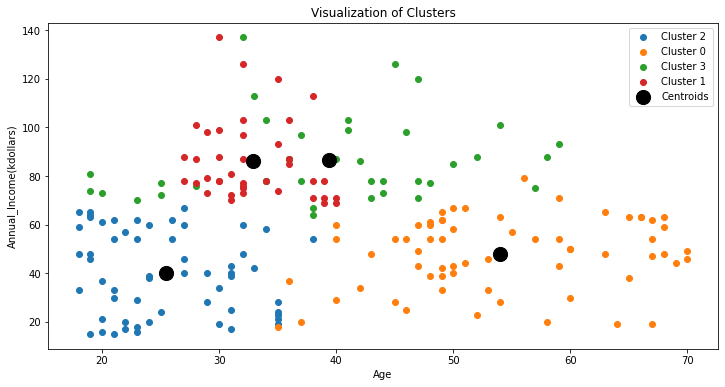

In [36]:
# Visualizing clusters (assuming you have 2 features)
plt.figure(figsize=(12, 6))
# Scatter plot for each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data["Age"], cluster_data["Annual_Income"], label=f'Cluster {cluster}')
# Plotting centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='black', label='Centroids')
plt.xlabel("Age")
plt.ylabel("Annual_Income(kdollars)")
plt.title('Visualization of Clusters')
plt.legend()
plt.show()





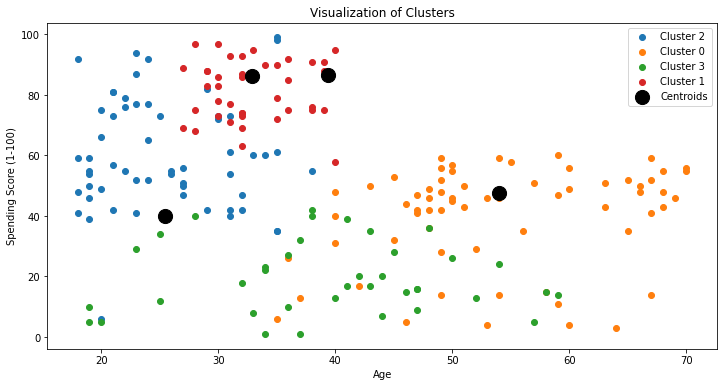

In [37]:
# Visualizing clusters (assuming you have 2 features)
plt.figure(figsize=(12, 6))

# Scatter plot for each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data["Age"], cluster_data["Spending_Score"], label=f'Cluster {cluster}')

# Plotting centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='black', label='Centroids')

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title('Visualization of Clusters')
plt.legend()
plt.show()

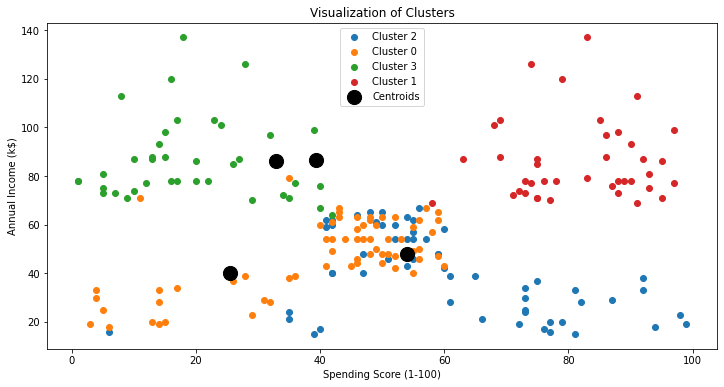

In [38]:
# Visualizing clusters (assuming you have 2 features)
plt.figure(figsize=(12, 6))

# Scatter plot for each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data["Spending_Score"], cluster_data["Annual_Income"], label=f'Cluster {cluster}')

# Plotting centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='black', label='Centroids')

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.title('Visualization of Clusters')
plt.legend()
plt.show()




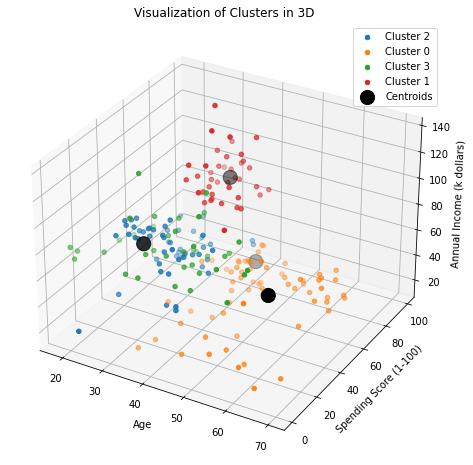

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df contains your dataset with a 'Cluster' column

# Visualizing clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data["Age"], cluster_data["Spending_Score"], cluster_data["Annual_Income"], label=f'Cluster {cluster}')

# Plotting centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', s=200, c='black', label='Centroids')

ax.set_xlabel("Age")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Annual Income (k dollars)")
ax.set_title('Visualization of Clusters in 3D')
ax.legend()

plt.show()


In [40]:
# Assuming df contains your dataset with a 'Cluster' column
# Assuming kmeans is your fitted KMeans model
# Assuming scaler is the scaler used to scale the data before clustering

# Selecting only the numerical features for clustering
features_for_clustering = df[['Age', 'Annual_Income', 'Spending_Score']]

# Transform cluster centroids back to the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame to store cluster profiles
cluster_profiles = pd.DataFrame(centroids, columns=features_for_clustering.columns)

# Display cluster profiles
for cluster in cluster_profiles.index:
    print(f"\nCluster {cluster} Profile:")
    print(cluster_profiles.loc[cluster])
    feature_stats = df[df['Cluster'] == cluster][['Age', 'Annual_Income', 'Spending_Score']].describe()
    print(f"\nMin values:\n{feature_stats.loc['min']}")
    print(f"\nMax values:\n{feature_stats.loc['max']}")
    print(f"\nMean values:\n{feature_stats.loc['mean']}")
    print(f"\nCount values:\n{feature_stats.loc['count']}")


Cluster 0 Profile:
Age               53.984615
Annual_Income     47.707692
Spending_Score    39.969231
Name: 0, dtype: float64

Min values:
Age               35.0
Annual_Income     18.0
Spending_Score     3.0
Name: min, dtype: float64

Max values:
Age               70.0
Annual_Income     79.0
Spending_Score    60.0
Name: max, dtype: float64

Mean values:
Age               53.984615
Annual_Income     47.707692
Spending_Score    39.969231
Name: mean, dtype: float64

Count values:
Age               65.0
Annual_Income     65.0
Spending_Score    65.0
Name: count, dtype: float64

Cluster 1 Profile:
Age               32.875
Annual_Income     86.100
Spending_Score    81.525
Name: 1, dtype: float64

Min values:
Age               27.0
Annual_Income     69.0
Spending_Score    58.0
Name: min, dtype: float64

Max values:
Age                40.0
Annual_Income     137.0
Spending_Score     97.0
Name: max, dtype: float64

Mean values:
Age               32.875
Annual_Income     86.100
Spending_Score   

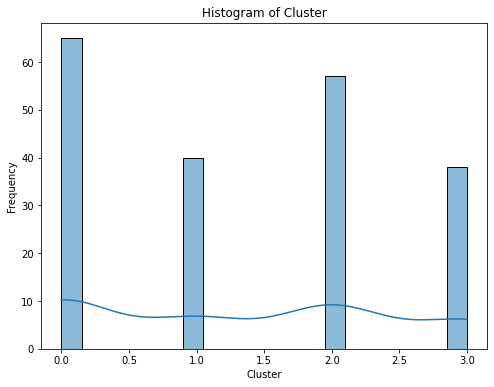

In [41]:
# Histogram of a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Cluster'], bins=20, kde=True)
plt.title('Histogram of Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

In [42]:
# # Once the model is trained, you can use it to predict segments for new data
# # For example, you can predict the segment for a new customer with features [new_age, new_annual_income, new_spending_score]
# new_customer_data = scaler.transform([[35, 137, 83]])
# predicted_cluster = knn_model.predict(new_customer_data)
# print(f"Predicted Segment for the new customer: {predicted_cluster}")

In [43]:
df

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,3
197,0,32,126,74,1
198,0,32,137,18,3


In [44]:
df.to_csv('output.csv', index=False)

In [45]:
path = os.getcwd()
file1 = path + "\output.csv"
file1

'C:\\Users\\Bhavana padisetty\\output.csv'

In [46]:
df1=pd.read_csv(file1)
df1.head()

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2


In [47]:
df1.tail()

,Gender,Age,Annual_Income,Spending_Score,Cluster
195,1,35,120,79,1
196,1,45,126,28,3
197,0,32,126,74,1
198,0,32,137,18,3
199,0,30,137,83,1


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
 4   Cluster         200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [49]:
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Cluster'], dtype='object')

In [50]:
df1.shape

(200, 5)

In [51]:
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Cluster'], dtype='object')

In [52]:
df1.describe()

,Gender,Age,Annual_Income,Spending_Score,Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000,1.340000
std,0.497633,13.969007,26.264721,25.823522,1.122811
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,0.000000
50%,1.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,3.000000


In [53]:
# To find the total no.of rows which are missing value in a column
df1.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
Cluster           0
dtype: int64

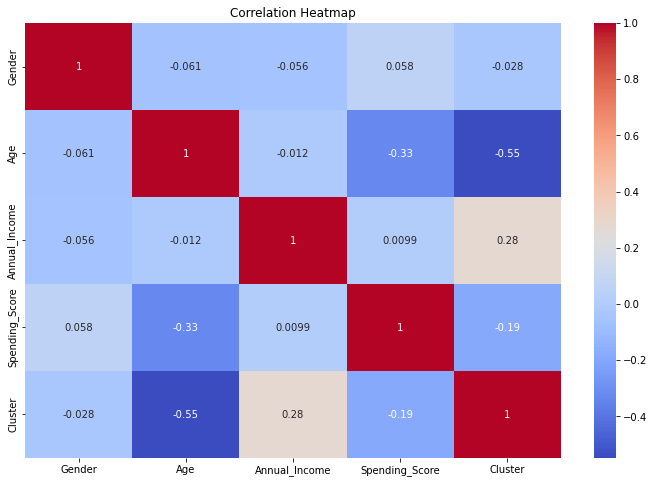

In [54]:
# Calculate correlation matrix
correlation_matrix = df1.corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [55]:
# Sort correlations for 'MSRP' column in descending order
sorted_corr_msrp = correlation_matrix['Cluster'].sort_values(ascending=False)
sorted_corr_msrp

Cluster           1.000000
Annual_Income     0.278589
Gender           -0.027700
Spending_Score   -0.188319
Age              -0.547477
Name: Cluster, dtype: float64

In [56]:
# Select only numeric type of columns by their names as:
x1 = df1[['Age','Annual_Income','Spending_Score']]
x1

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [57]:
y1=df1[['Cluster']]
y1

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
195,1
196,3
197,1
198,3


In [58]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (160, 3)
X_test: (40, 3)


In [59]:
unique_values = df1['Cluster'].unique()
unique_values


array([2, 0, 3, 1], dtype=int64)

In [60]:

from sklearn.preprocessing import StandardScaler
# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
model = KNeighborsClassifier(n_neighbors=5)
# Fit the model to the training data
model.fit(X_train, y1_train)


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
# Make predictions on the test data
y1_pred = model.predict(X_test)


In [63]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
confusion = confusion_matrix(y1_test, y1_pred)
report = classification_report(y1_test, y1_pred)
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.88
Confusion Matrix:
[[10  0  0  2]
 [ 0  5  0  0]
 [ 1  0 11  0]
 [ 0  0  2  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       1.00      1.00      1.00         5
           2       0.85      0.92      0.88        12
           3       0.82      0.82      0.82        11

    accuracy                           0.88        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.88      0.88      0.87        40



In [64]:
x1.tail()

,Age,Annual_Income,Spending_Score
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18
199,30,137,83


In [65]:
y1.tail()

,Cluster
195,1
196,3
197,1
198,3
199,1


In [66]:
Age=35
Annual_Income=120
Spending_Score= 79
y1_pred = model.predict([[Age,Annual_Income,Spending_Score]])
print(f"Predicted Value: {y1_pred}")

Predicted Value: [1]


In [67]:
import pickle
pickle.dump(model, open("out_put.pkl", "wb"))

In [68]:

# load the model
model = pickle.load(open("out_put.pkl", "rb"))

# Assuming you have a trained model 'model' and a scaler 'scaler'
Age = 18
Annual_Income = 15
Spending_Score = 6

# Standardize the input features
scaled_input = scaler.transform([[Age, Annual_Income, Spending_Score]])

# Make predictions
predicted_cluster = model.predict(scaled_input)

print(f"Predicted Cluster: {predicted_cluster}")



Predicted Cluster: [2]


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
